<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Flight-Delay" data-toc-modified-id="Flight-Delay-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Flight Delay</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Ознакомление-с-данными" data-toc-modified-id="Ознакомление-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ознакомление с данными</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Найти-аэропорт-с-минимальной-задержкой-вылета" data-toc-modified-id="Найти-аэропорт-с-минимальной-задержкой-вылета-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Найти аэропорт с минимальной задержкой вылета</a></span></li><li><span><a href="#Самая-пунктуальная-авиакомпания-на-прилет-в-Los-Angeles-International-Airport" data-toc-modified-id="Самая-пунктуальная-авиакомпания-на-прилет-в-Los-Angeles-International-Airport-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport</a></span></li><li><span><a href="#Найти-аэропорт,-где-самолёты-проводят-больше-всего-времени-на-рулении-(среднее-значение)" data-toc-modified-id="Найти-аэропорт,-где-самолёты-проводят-больше-всего-времени-на-рулении-(среднее-значение)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Найти аэропорт, где самолёты проводят больше всего времени на рулении (среднее значение)</a></span></li><li><span><a href="#Построить-модель-которая-будет-выбирать-топ-3-аэропорта-прилета-(вероятность-опоздания-минимальная-–-RMSE-метрика),-в-зависимости-от-аэропорта-вылета" data-toc-modified-id="Построить-модель-которая-будет-выбирать-топ-3-аэропорта-прилета-(вероятность-опоздания-минимальная-–-RMSE-метрика),-в-зависимости-от-аэропорта-вылета-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика), в зависимости от аэропорта вылета</a></span></li></ul></li></ul></div>

# Flight Delay

## Загрузка данных

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [109]:
df_airlines = pd.read_csv('airlines.csv')
df_airports = pd.read_csv('airports.csv')
df_flights = pd.read_csv('flights.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [110]:
df_airlines.tail()

,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


In [111]:
df_airports.tail()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


In [112]:
df_flights.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Ознакомление с данными

In [113]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [114]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [115]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [116]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


## Подготовка данных

In [117]:
#проверка на наличие дубликатов

In [118]:
df_flights.duplicated().sum()

0

In [119]:
df_airports.duplicated().sum()

0

In [120]:
df_airlines.duplicated().sum()

0

In [121]:
#проверка на наличие пропусков
df_flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [122]:
df_airlines.isna().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [123]:
df_airports.isna().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [124]:
df_flights_NULL = df_flights.isnull().sum()*100/df_flights.shape[0]
df_flights_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [125]:
#удаляем строки со значением nan (менее 2% в столбце)

df_flights = df_flights.dropna(subset = ['TAIL_NUMBER',
                                           'DEPARTURE_TIME',
                                           'DEPARTURE_DELAY',
                                           'TAXI_OUT',
                                           'WHEELS_OFF',
                                           'SCHEDULED_TIME',
                                           'ELAPSED_TIME',
                                           'AIR_TIME',
                                           'WHEELS_ON',
                                           'TAXI_IN',
                                           'ARRIVAL_TIME',
                                           'ARRIVAL_DELAY'])

In [126]:
#удаляем столбцы со значительным процентом nan (более 80% в столбце)

df_flights = df_flights.drop(['CANCELLATION_REASON',
                                  'AIR_SYSTEM_DELAY',
                                  'SECURITY_DELAY',
                                  'AIRLINE_DELAY',
                                  'LATE_AIRCRAFT_DELAY',
                                  'WEATHER_DELAY'], axis=1)

In [127]:
df_flights.isna().sum().sum()

0

In [128]:
#строки с nan
df_airports[df_airports.isna().any(axis=1)]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [129]:
#отсутствующие данные по трем аэропортам можно найти в открытом доступе на ресурсе https://geohack.toolforge.org
#Northwest Florida Beaches International Airport (30.358333,-85.795556), 
#Plattsburgh International Airport(44.650833,-73.468056),
#Northeast Florida Regional Airport (29.95925,-81.339722)

In [130]:
#повторяем проверку на nan
df_airports.isna().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [131]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
count,5714008.0,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,...,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5714008.0,5714008.0
mean,2015.0,6.547799e+00,1.570759e+01,3.932643e+00,2.164384e+03,1.328907e+03,1.335066e+03,9.294842e+00,1.606550e+01,1.357099e+03,...,1.370062e+02,1.135116e+02,8.244569e+02,1.471319e+03,7.429063e+00,1.493187e+03,1.476373e+03,4.407057e+00,0.0,0.0
std,0.0,3.397421e+00,8.774394e+00,1.985967e+00,1.754706e+03,4.835251e+02,4.964198e+02,3.688972e+01,8.882449e+00,4.980237e+02,...,7.421107e+01,7.223082e+01,6.086620e+02,5.218682e+02,5.618951e+00,5.069011e+02,5.259730e+02,3.927130e+01,0.0,0.0
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.400000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+01,0.0,0.0
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.280000e+02,9.160000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,8.200000e+01,6.000000e+01,3.730000e+02,1.054000e+03,4.000000e+00,1.110000e+03,1.058000e+03,-1.300000e+01,0.0,0.0
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.681000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.180000e+02,9.400000e+01,6.500000e+02,1.508000e+03,6.000000e+00,1.520000e+03,1.512000e+03,-5.000000e+00,0.0,0.0
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.211000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.680000e+02,1.440000e+02,1.065000e+03,1.911000e+03,9.000000e+00,1.917000e+03,1.916000e+03,8.000000e+00,0.0,0.0
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.320000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,7.660000e+02,6.900000e+02,4.983000e+03,2.400000e+03,2.480000e+02,2.400000e+03,2.400000e+03,1.971000e+03,0.0,0.0


In [132]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [133]:
#продолжаем обработку data_flights

In [134]:
df_flights['Date'] = pd.to_datetime(df_flights[['YEAR','MONTH','DAY']], dayfirst=True)

In [135]:
df_flights['Day'] = df_flights['Date'].dt.day_name()

In [136]:
df_flights.shape

(5714008, 27)

In [137]:
#объединяем таблицы data_flights и df_airlines

In [138]:
df_flights = df_flights.merge(df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [139]:
df_flights = df_flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [140]:
df_flights = df_flights.rename(columns={"AIRLINE_y":"AIRLINE"})

In [141]:
#объединяем таблицы data_flights и df_airports

In [142]:
df_flights = df_flights.merge(df_airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
df_flights = df_flights.merge(df_airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [143]:
df_flights = df_flights.drop(['LATITUDE_x',
                                  'LONGITUDE_x',
                                  'STATE_y',
                                  'COUNTRY_y',
                                  'LATITUDE_y',
                                  'LONGITUDE_y','STATE_x',
                                  'COUNTRY_x'], axis=1)

In [144]:
df_flights = df_flights.rename(columns={'IATA_CODE_x':'Orig_Airport_Code',
                                            'AIRPORT_x':'Orig_Airport_Name',
                                            'CITY_x':'Origin_city',
                                            'IATA_CODE_y':'Dest_Airport_Code',
                                            'AIRPORT_y':'Dest_Airport_Name',
                                            'CITY_y':'Destination_city'})

In [145]:
df_flights = df_flights.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'], axis=1)

In [146]:
# создаем функцию для формтаирования времени
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [147]:
df_flights['Scheduled_Departure'] = df_flights['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
df_flights['Actual_Departure'] = df_flights['DEPARTURE_TIME'].apply(Format_Hourmin)
df_flights['Scheduled_Arrival'] = df_flights['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
df_flights['Actual_Arrival'] = df_flights['ARRIVAL_TIME'].apply(Format_Hourmin)

In [148]:
# удаляем лишние столбцы

df_flights = df_flights.drop(['DEPARTURE_TIME',
                              'SCHEDULED_ARRIVAL',
                              'SCHEDULED_DEPARTURE',
                              'ARRIVAL_TIME'], axis=1)

In [149]:
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Date', 'Day', 'AIRLINE',
       'Orig_Airport_Code', 'Orig_Airport_Name', 'Origin_city',
       'Dest_Airport_Code', 'Dest_Airport_Name', 'Destination_city',
       'Scheduled_Departure', 'Actual_Departure', 'Scheduled_Arrival',
       'Actual_Arrival'],
      dtype='object')

In [150]:
neworder = ['Date', 'Day', 'AIRLINE', 'Orig_Airport_Code','Orig_Airport_Name','Origin_city',
            'Dest_Airport_Code', 'Dest_Airport_Name', 'Destination_city','Scheduled_Departure','Actual_Departure',
            'DEPARTURE_DELAY','Scheduled_Arrival','Actual_Arrival','ARRIVAL_DELAY','YEAR', 'MONTH', 'DAY',
            'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
            'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN','DIVERTED','CANCELLED']

df_flights = df_flights.reindex(columns=neworder)

In [151]:
df_flights[['Scheduled_Departure','Actual_Departure',
            'DEPARTURE_DELAY','Scheduled_Arrival','Actual_Arrival','ARRIVAL_DELAY',
             'TAXI_OUT','TAXI_IN','SCHEDULED_TIME']]

,Scheduled_Departure,Actual_Departure,DEPARTURE_DELAY,Scheduled_Arrival,Actual_Arrival,ARRIVAL_DELAY,TAXI_OUT,TAXI_IN,SCHEDULED_TIME
0,00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,21.0,4.0,205.0
1,00:45:00,00:41:00,-4.0,05:09:00,04:55:00,-14.0,17.0,4.0,204.0
2,01:55:00,01:40:00,-15.0,06:33:00,05:58:00,-35.0,17.0,11.0,218.0
3,02:20:00,02:09:00,-11.0,06:40:00,06:28:00,-12.0,15.0,8.0,200.0
4,05:05:00,04:57:00,-8.0,09:30:00,09:16:00,-14.0,16.0,4.0,205.0
...,...,...,...,...,...,...,...,...,...
5231125,20:46:00,20:37:00,-9.0,21:20:00,21:02:00,-18.0,6.0,2.0,34.0
5231126,14:35:00,16:16:00,101.0,15:09:00,16:39:00,90.0,4.0,5.0,34.0
5231127,20:46:00,20:56:00,10.0,21:20:00,21:30:00,10.0,12.0,4.0,34.0
5231128,14:35:00,14:21:00,-14.0,15:09:00,14:51:00,-18.0,9.0,3.0,34.0


In [152]:
df_flights.isna().sum().sum()

2757

In [153]:
df_flights = df_flights.dropna(subset = ['Actual_Departure',
                                         'Scheduled_Arrival',
                                         'Actual_Arrival'
                                           ])

In [154]:
df_flights.isna().sum().sum()

0

In [155]:
df_flights.shape

(5228373, 31)

## Найти аэропорт с минимальной задержкой вылета 

In [156]:
a = df_flights.groupby(['Orig_Airport_Name','Origin_city']).mean()['DEPARTURE_DELAY'].sort_values()

In [157]:
a[:15]

Orig_Airport_Name                             Origin_city
Yakutat Airport                               Yakutat       -6.507692
Canyonlands Field                             Moab          -6.058537
Elko Regional Airport                         Elko          -3.771760
Valdez Airport                                Vernal        -3.740000
Merle K. (Mudhole) Smith Airport              Cordova       -3.268405
Lewiston-Nez Perce County Airport             Lewiston      -2.976190
Pocatello Regional Airport                    Pocatello     -1.328221
Deadhorse Airport (Prudhoe Bay Airport)       Deadhorse     -0.949755
Hilo International Airport                    Hilo          -0.889804
Magic Valley Regional Airport (Joslin Field)  Twin Falls    -0.875776
Bellingham International Airport              Bellingham    -0.419034
Brainerd Lakes Regional Airport               Brainerd      -0.065292
Kodiak Airport                                Kodiak         0.405034
Lihue Airport                   

In [158]:
b = df_flights[df_flights['DEPARTURE_DELAY'] > 0]

In [159]:
b1 = b.groupby(['Orig_Airport_Name','Origin_city']).mean()['DEPARTURE_DELAY'].sort_values()

In [160]:
b1[:15]

Orig_Airport_Name                           Origin_city     
King Salmon Airport                         King Salmon         13.800000
Hilo International Airport                  Hilo                16.342029
Dillingham Airport                          Dillingham          20.960000
Honolulu International Airport              Honolulu            21.921351
Kahului Airport                             Kahului             22.235131
Kona International Airport at Keahole       Kailua/Kona         22.559646
Lihue Airport                               Lihue               22.624664
Canyonlands Field                           Moab                23.909091
Westerly State Airport                      West Yellowstone    24.243902
Kodiak Airport                              Kodiak              24.543307
Seattle-Tacoma International Airport        Seattle             25.172730
John Wayne Airport (Orange County Airport)  Santa Ana           25.257718
Oakland International Airport               Oakland

## Самая пунктуальная авиакомпания на прилет в Los Angeles International Airport

In [161]:
LA_arrival = df_flights[df_flights['Dest_Airport_Name']=='Los Angeles International Airport']

In [162]:
LA_2 = LA_arrival.groupby('AIRLINE').size()
LA_3 = LA_arrival[LA_arrival['ARRIVAL_DELAY']<=5] # если не считать 5-минутное опоздание за опоздание
LA_4 = LA_3.groupby('AIRLINE').size()
LA_p = (LA_4/LA_2)*100
LA_p.sort_values(ascending=False)

AIRLINE
Hawaiian Airlines Inc.          79.379444
Alaska Airlines Inc.            74.270096
Delta Air Lines Inc.            72.124017
American Airlines Inc.          71.041802
JetBlue Airways                 70.445545
Virgin America                  67.570341
US Airways Inc.                 66.091954
Skywest Airlines Inc.           64.745631
United Air Lines Inc.           63.508876
Southwest Airlines Co.          60.967628
American Eagle Airlines Inc.    59.259259
Frontier Airlines Inc.          59.067735
Spirit Air Lines                53.271028
dtype: float64

## Найти аэропорт, где самолёты проводят больше всего времени на рулении (среднее значение)

In [163]:
taxing = df_flights.copy()

In [164]:
taxing['taxing'] = taxing['TAXI_OUT'] + taxing['TAXI_IN']

In [165]:
t1 = taxing.groupby(['Orig_Airport_Name','Origin_city']).mean()['taxing'].sort_values(ascending=False)

In [166]:
t1[:10]

Orig_Airport_Name                                                       Origin_city 
LaGuardia Airport (Marine Air Terminal)                                 New York        34.524761
Sioux Gateway Airport                                                   Sioux City      34.368421
Sawyer International Airport                                            Marquette       34.209459
John F. Kennedy International Airport (New York International Airport)  New York        34.185193
Waterloo Regional Airport                                               Waterloo        31.688468
Ithaca Tompkins Regional Airport                                        Ithaca          30.266667
St. Cloud Regional Airport                                              St Cloud        30.103896
Philadelphia International Airport                                      Philadelphia    29.648114
Eagle County Regional Airport                                           Eagle           29.074290
Sloulin Field International Airpo

## Построить модель которая будет выбирать топ 3 аэропорта прилета (вероятность опоздания минимальная – RMSE метрика), в зависимости от аэропорта вылета  

In [168]:
len(df_flights.Orig_Airport_Code.unique())

322

In [169]:
lax_data = df_flights[df_flights['Orig_Airport_Code']=='LAX']

In [173]:
lax_data = lax_data[['Date', 'ARRIVAL_DELAY']]
lax_data = lax_data.groupby('Date').mean().reset_index()

In [174]:
lax_data.head()

,Date,ARRIVAL_DELAY
0,2015-01-01,4.614130
1,2015-01-02,16.513428
2,2015-01-03,26.056140
3,2015-01-04,28.045977
4,2015-01-05,15.788618


In [175]:
lax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           334 non-null    datetime64[ns]
 1   ARRIVAL_DELAY  334 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [176]:
lax_data['ARRIVAL_DELAY'] = lax_data.ARRIVAL_DELAY.replace(',','.')

In [177]:
lax_data['ARRIVAL_DELAY'] = pd.to_numeric(lax_data['ARRIVAL_DELAY'])

In [178]:
lax_data['Date'] = pd.to_datetime(lax_data['Date'],dayfirst=True)

In [179]:
lax_data.Date.min()

Timestamp('2015-01-01 00:00:00')

<AxesSubplot:>

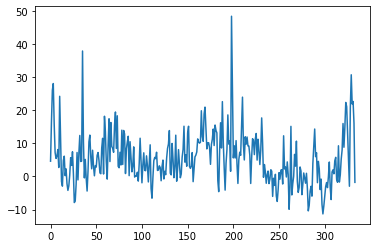

In [180]:
lax_data.ARRIVAL_DELAY.plot()

In [181]:
lax_data.sort_values(by=['Date'],inplace=True)

In [182]:
lax_data.head()

,Date,ARRIVAL_DELAY
0,2015-01-01,4.614130
1,2015-01-02,16.513428
2,2015-01-03,26.056140
3,2015-01-04,28.045977
4,2015-01-05,15.788618


In [183]:
lax_data.set_index('Date', inplace=True)
lax_data.sort_index(inplace=True)
print('Монотонность - ',lax_data.index.is_monotonic)

Монотонность -  True


In [184]:
lax_data.head()

,ARRIVAL_DELAY
Date,
2015-01-01,4.614130
2015-01-02,16.513428
2015-01-03,26.056140
2015-01-04,28.045977
2015-01-05,15.788618


<AxesSubplot:xlabel='Date'>

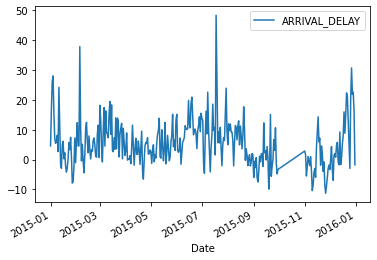

In [185]:
lax_data.plot()

<AxesSubplot:xlabel='Date'>

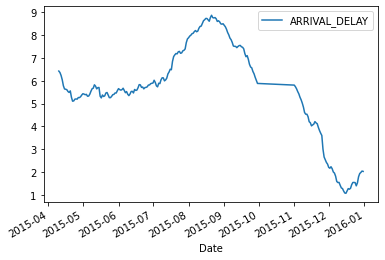

In [186]:
lax_data.rolling(100).mean().plot()

In [187]:
lax_data

,ARRIVAL_DELAY
Date,
2015-01-01,4.614130
2015-01-02,16.513428
2015-01-03,26.056140
2015-01-04,28.045977
2015-01-05,15.788618
...,...
2015-12-27,30.691228
2015-12-28,21.883513
2015-12-29,22.626761


In [188]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['ARRIVAL_DELAY'].shift(lag)

    data['ARRIVAL_DELAY_mean'] = data['ARRIVAL_DELAY'].shift().rolling(rolling_mean_size).mean().copy()

In [189]:
make_features(lax_data, 7, 3)

In [190]:
lax_data

,ARRIVAL_DELAY,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ARRIVAL_DELAY_mean
Date,,,,,,,,,,,,,,
2015-01-01,4.614130,2015,1,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,16.513428,2015,1,2,4,0,4.614130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,26.056140,2015,1,3,5,0,16.513428,4.614130,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,28.045977,2015,1,4,6,0,26.056140,16.513428,4.614130,NaN,NaN,NaN,NaN,15.727900
2015-01-05,15.788618,2015,1,5,0,0,28.045977,26.056140,16.513428,4.614130,NaN,NaN,NaN,23.538515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,30.691228,2015,12,27,6,0,20.906810,-2.946237,4.245283,13.101549,21.084192,22.345238,14.794690,7.401952
2015-12-28,21.883513,2015,12,28,0,0,30.691228,20.906810,-2.946237,4.245283,13.101549,21.084192,22.345238,16.217267
2015-12-29,22.626761,2015,12,29,1,0,21.883513,30.691228,20.906810,-2.946237,4.245283,13.101549,21.084192,24.493850


In [191]:
lax_data.dropna(inplace=True)

In [192]:
lax_data

,ARRIVAL_DELAY,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ARRIVAL_DELAY_mean
Date,,,,,,,,,,,,,,
2015-01-08,6.203152,2015,1,8,3,0,5.442446,7.234004,15.788618,28.045977,26.056140,16.513428,4.614130,9.488356
2015-01-09,8.132042,2015,1,9,4,0,6.203152,5.442446,7.234004,15.788618,28.045977,26.056140,16.513428,6.293201
2015-01-10,2.709746,2015,1,10,5,0,8.132042,6.203152,5.442446,7.234004,15.788618,28.045977,26.056140,6.592547
2015-01-11,24.195531,2015,1,11,6,0,2.709746,8.132042,6.203152,5.442446,7.234004,15.788618,28.045977,5.681647
2015-01-12,10.781362,2015,1,12,0,0,24.195531,2.709746,8.132042,6.203152,5.442446,7.234004,15.788618,11.679106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,30.691228,2015,12,27,6,0,20.906810,-2.946237,4.245283,13.101549,21.084192,22.345238,14.794690,7.401952
2015-12-28,21.883513,2015,12,28,0,0,30.691228,20.906810,-2.946237,4.245283,13.101549,21.084192,22.345238,16.217267
2015-12-29,22.626761,2015,12,29,1,0,21.883513,30.691228,20.906810,-2.946237,4.245283,13.101549,21.084192,24.493850


In [193]:
from sklearn.model_selection import train_test_split

In [194]:
features = lax_data.drop(['ARRIVAL_DELAY'],axis = 1)
target = lax_data['ARRIVAL_DELAY']
X_train,X_test,y_train, y_test = train_test_split(features,target, shuffle=False, test_size=0.25)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (245, 13)
X_test (82, 13)


In [195]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [196]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [197]:
arrd_predicted_lr = model_lr.predict(X_test)

In [198]:
arrd_predicted_lr

array([ 6.38597072e-01,  3.81359771e+00,  2.97905087e+00,  1.18940511e+00,
        6.33711604e+00,  1.70136793e+00,  4.12437173e+00,  4.01678910e+00,
        4.81461306e+00,  2.53903805e+00,  1.78077526e+00,  1.98857336e+00,
        7.03112931e+00, -2.86792165e+00,  4.70558377e+00,  3.97521211e+00,
        2.41113108e+00,  3.25051918e+00,  8.74802652e+00,  4.01792278e-01,
        1.24559096e+00,  3.43789252e+00,  3.07292048e+00,  2.09966630e+00,
        2.11355711e+00,  2.64154429e+00,  2.17400435e+00,  1.45594343e+00,
        3.38398051e+00,  2.75912847e+00, -6.65449359e-01, -1.85343820e+00,
        5.80814298e-02,  1.56527245e-01,  1.28770569e-01,  6.52836641e-01,
        2.80933195e+00,  2.61105023e+00,  5.69322266e+00,  4.67838208e+00,
        7.14198131e+00,  2.54135787e+00,  6.76380224e+00,  3.67601723e+00,
        2.53711418e+00,  3.98195432e+00, -1.64216023e-02, -1.81029881e+00,
        3.58254787e-01,  5.09713497e-02, -1.61553941e+00,  5.85829349e-01,
       -5.22514428e-01,  

In [199]:
print("RMSE тестовой выборки LinearRegression: ",np.sqrt(mean_squared_error(y_test, arrd_predicted_lr)))

RMSE тестовой выборки LinearRegression:  6.792795830679128


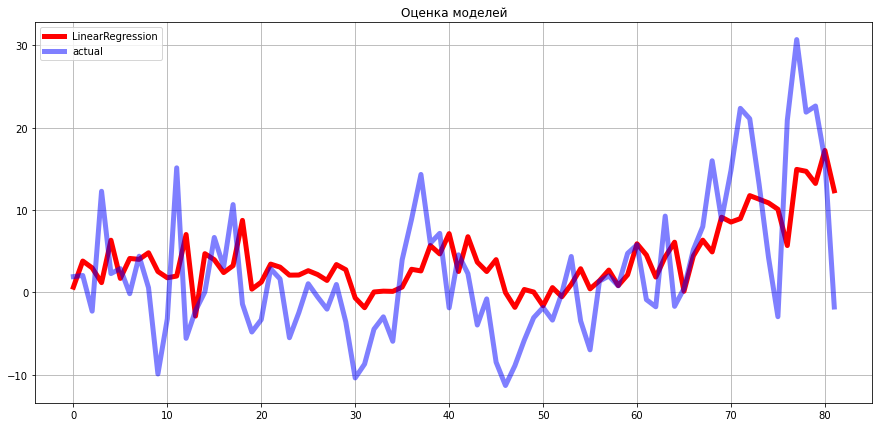

In [200]:
plt.figure(figsize=(15, 7))
plt.plot(arrd_predicted_lr, "r",linewidth=5, label="LinearRegression")
plt.plot(y_test.values,'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);